In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"C:\Users\Lenovo\Downloads\datasets\Datasets\Problem2_Site_BrowingBehavior.csv",delimiter='\t',header=None ) 


In [3]:
df.columns = ['timestamp','userid','section_visited']
df.head()

,timestamp,userid,section_visited
0,2017-07-26 00:01:40.965,0,product
1,2017-07-26 00:03:18.448,0,product
2,2017-07-26 00:36:59.028,0,default
3,2017-07-26 00:41:17.273,0,product-listing-category
4,2017-07-26 00:45:39.197,0,content


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'product'),
  Text(1, 0, 'default'),
  Text(2, 0, 'product-listing-category'),
  Text(3, 0, 'content'),
  Text(4, 0, 'home'),
  Text(5, 0, 'cart'),
  Text(6, 0, 'product-listing-search'),
  Text(7, 0, 'iroa'),
  Text(8, 0, 'shoplive'),
  Text(9, 0, 'productNotFound'),
  Text(10, 0, 'product-listing-custom'),
  Text(11, 0, 'signupcomplete'),
  Text(12, 0, 'mys'),
  Text(13, 0, 'error'),
  Text(14, 0, 'lorigreiner'),
  Text(15, 0, 'wishlist'),
  Text(16, 0, 'category')])

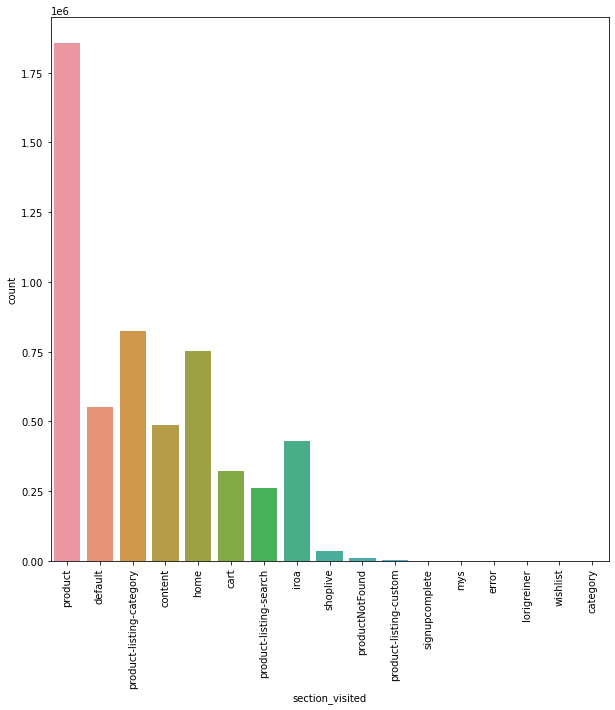

In [4]:
plt.figure(figsize=(10,10))
sns.countplot(df['section_visited'])
plt.xticks(rotation=90)

In [5]:
login_count = df.groupby('userid')['section_visited'].agg(['count']).reindex(df['userid']).reset_index()
login_count.columns = ['userid','no of times visited']
login_count.drop_duplicates(inplace = True)

In [6]:
login_count

,userid,no of times visited
0,0,1407879
101129,544439661706349,10
101130,634394594974068,19
101134,887103105578626,10
101136,962713767308725,18
...,...,...
5535809,9202691155176786907,1
5535842,9211397447749099251,1
5535851,9213196462937193832,1
5535908,9221112539920467692,1


In [7]:
fd = pd.read_csv(r"C:\Users\Lenovo\Downloads\datasets\Datasets\Problem2_FInalConversions.csv" ,delimiter='\t',header=None)
fd.columns = ['timestamp','userid','product_purchased','cart_value']

In [8]:
fd.head()

,timestamp,userid,product_purchased,cart_value
0,2017-07-26 00:00:10.465,0,A293532,52.14
1,2017-07-26 00:00:12.301,0,H209597,31.50
2,2017-07-26 00:00:12.388,0,H211370,30.48
3,2017-07-26 00:00:14.389,0,A282331,51.00
4,2017-07-26 00:00:16.837,0,H211410,16.74


In [9]:
df_final = pd.merge(fd,df, on =['userid'],how ='inner',left_index=True , right_index=True)

In [10]:
df_final

,timestamp_x,userid,product_purchased,cart_value,timestamp_y,section_visited
0,2017-07-26 00:00:10.465,0,A293532,52.14,2017-07-26 00:01:40.965,product
1,2017-07-26 00:00:12.301,0,H209597,31.50,2017-07-26 00:03:18.448,product
2,2017-07-26 00:00:12.388,0,H211370,30.48,2017-07-26 00:36:59.028,default
3,2017-07-26 00:00:14.389,0,A282331,51.00,2017-07-26 00:41:17.273,product-listing-category
4,2017-07-26 00:00:16.837,0,H211410,16.74,2017-07-26 00:45:39.197,content
...,...,...,...,...,...,...
79790,2017-07-26 23:09:08.202,9174973170462435039,K45766,89.96,2017-07-26 00:39:14.899,home
79791,2017-07-26 23:44:19.505,9179943977593655876,V34738,24.66,2017-07-26 00:39:14.909,content
79792,2017-07-26 23:53:15.661,9179943977593655876,H210000,21.64,2017-07-26 00:39:14.944,home
79793,2017-07-26 23:13:02.55,9211905364441411643,A209343,73.00,2017-07-26 00:39:15.161,product


In [11]:
df_final['timestamp_x'] = df_final['timestamp_x'].astype(str)
df_final['timestamp_y'] = df_final['timestamp_y'].astype(str)

df_final['timestamp_x'] = df_final['timestamp_x'].str.split(".",expand=True)[0]
df_final['timestamp_y'] = df_final['timestamp_y'].str.split(".",expand=True)[0]

In [12]:
df_final.head()

,timestamp_x,userid,product_purchased,cart_value,timestamp_y,section_visited
0,2017-07-26 00:00:10,0,A293532,52.14,2017-07-26 00:01:40,product
1,2017-07-26 00:00:12,0,H209597,31.50,2017-07-26 00:03:18,product
2,2017-07-26 00:00:12,0,H211370,30.48,2017-07-26 00:36:59,default
3,2017-07-26 00:00:14,0,A282331,51.00,2017-07-26 00:41:17,product-listing-category
4,2017-07-26 00:00:16,0,H211410,16.74,2017-07-26 00:45:39,content


In [13]:
df_final['date_time_x'] = pd.to_datetime(df_final['timestamp_x'])
df_final['date_time_y'] = pd.to_datetime(df_final['timestamp_y'])

In [14]:
import datetime 
from datetime import timedelta

In [15]:
 def  time_conversion(df_final):
        time_diff = df_final['date_time_y'] - df_final['date_time_x']
        ts = time_diff.total_seconds()
        minutes = ts/60
        return abs(minutes)
    
df_final['time_spent_minutes_day'] = df_final.apply(time_conversion, axis=1)

In [16]:
df_final.drop (['timestamp_x','timestamp_y','date_time_x','date_time_y'], inplace=True,axis =1)

In [17]:
df_final.head()

,userid,product_purchased,cart_value,section_visited,time_spent_minutes_day
0,0,A293532,52.14,product,1.500000
1,0,H209597,31.50,product,3.100000
2,0,H211370,30.48,default,36.783333
3,0,A282331,51.00,product-listing-category,41.050000
4,0,H211410,16.74,content,45.383333


In [18]:
#total money spent 

df_cart = df_final.groupby('userid')['cart_value'].agg(['sum']).reindex(df_final['userid']).reset_index()
df_cart.drop_duplicates(inplace=True)
df_cart.columns = ['userid','total_cart_value']
df_cart.head()

,userid,total_cart_value
0,0,1375101.66
548,5942997097932061,157.95
549,23951842225160889,60.96
551,30833658052409950,216.12
552,33873861847792934,53.24


In [19]:
#total products purchased by user

df_cart_products = df_final.groupby('userid')['product_purchased'].agg(['count']).reindex(df_final['userid']).reset_index()
df_cart_products.drop_duplicates(inplace=True)
df_cart_products.columns = ['userid','total_product_purchased']
df_cart_products.head()

,userid,total_product_purchased
0,0,20197
548,5942997097932061,1
549,23951842225160889,2
551,30833658052409950,5
552,33873861847792934,1


In [20]:
df_cart_time = df_final.groupby('userid')['time_spent_minutes_day'].agg(['sum']).reindex(df_final['userid']).reset_index()
df_cart_time.drop_duplicates(inplace=True)
pd.set_option("display.float_format", lambda x : '%.3f' % x)
df_cart_time.columns = ['userid','total_timespent']
df_cart_time.head()

,userid,total_timespent
0,0,11780947.583
548,5942997097932061,0.450
549,23951842225160889,52.067
551,30833658052409950,381.183
552,33873861847792934,10.050


In [21]:
df_final.drop_duplicates(subset='userid' , keep='first', inplace = True)

df_final = pd.merge(df_final,df_cart, on=['userid'], how='inner', left_index=True, right_index= True )

df_final = pd.merge(df_final,df_cart_products, on=['userid'], how='inner', left_index=True, right_index= True )

df_final = pd.merge(df_final,df_cart_time, on=['userid'], how='inner', left_index=True, right_index= True )

df_final = pd.merge(df_final, login_count, on=['userid'], how='inner')

In [22]:
df_final.head()

,userid,product_purchased,cart_value,section_visited,time_spent_minutes_day,total_cart_value,total_product_purchased,total_timespent,no of times visited
0,0,A293532,52.140,product,1.500,1375101.660,20197,11780947.583,1407879
1,23951842225160889,H211370,33.480,product-listing-search,26.033,60.960,2,52.067,8
2,30833658052409950,H211394,44.680,content,54.917,216.120,5,381.183,13
3,33873861847792934,H211800,53.240,product,10.050,53.240,1,10.050,5
4,42949238806579040,A286591,30.000,default,14.433,52.480,2,1424.217,20


In [25]:
df_final.drop(['userid','product_purchased','cart_value','section_visited','time_spent_minutes_day'] ,axis=1,inplace=True)

In [26]:
df_final['buy_probab'] = (df_final['total_product_purchased']/df_final['no of times visited'])

df_final.head()

,total_cart_value,total_product_purchased,total_timespent,no of times visited,buy_probab
0,1375101.660,20197,11780947.583,1407879,0.014
1,60.960,2,52.067,8,0.250
2,216.120,5,381.183,13,0.385
3,53.240,1,10.050,5,0.200
4,52.480,2,1424.217,20,0.100


In [27]:
##creating user rank on the basis of buying probability and total value of his cart
df_final['user_rank'] = (df_final['buy_probab']*df_final['total_cart_value'])
df_final.head()

,total_cart_value,total_product_purchased,total_timespent,no of times visited,buy_probab,user_rank
0,1375101.660,20197,11780947.583,1407879,0.014,19726.786
1,60.960,2,52.067,8,0.250,15.240
2,216.120,5,381.183,13,0.385,83.123
3,53.240,1,10.050,5,0.200,10.648
4,52.480,2,1424.217,20,0.100,5.248


In [29]:
df_final.drop(df_final.index[0],inplace=True)

df_final.head()

,total_cart_value,total_product_purchased,total_timespent,no of times visited,buy_probab,user_rank
1,60.960,2,52.067,8,0.250,15.240
2,216.120,5,381.183,13,0.385,83.123
3,53.240,1,10.050,5,0.200,10.648
4,52.480,2,1424.217,20,0.100,5.248
5,111.980,2,80.583,18,0.111,12.442


In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df_final.drop(['user_rank'],axis=1)
Y= df_final[['user_rank']]

sc = StandardScaler()
z = sc.fit(X)


In [31]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.33, random_state=10)

In [34]:
from sklearn.ensemble import ExtraTreesRegressor
etr = ExtraTreesRegressor()
etr.fit(X_train,Y_train)

y_pred = etr.predict(X_test)

In [35]:
from sklearn.metrics import mean_squared_error , r2_score

r2_score(Y_test,y_pred)

0.940136477684977